In [5]:
import numpy as np
import pandas as pd

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
student_performance = pd.read_csv('https://stepik.org/media/attachments/course/4852/StudentsPerformance.csv')

In [5]:
student_performance.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


<Axes: >

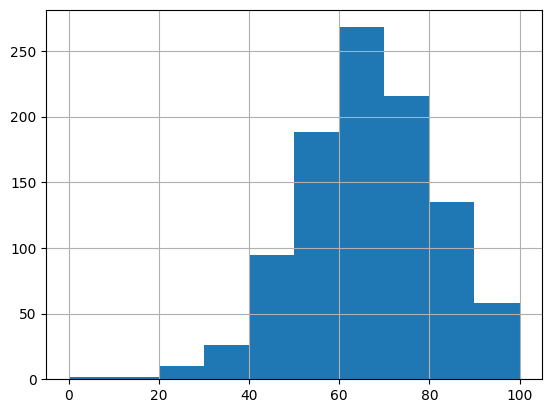

In [7]:
student_performance['math score'].hist()

<Axes: xlabel='math score', ylabel='reading score'>

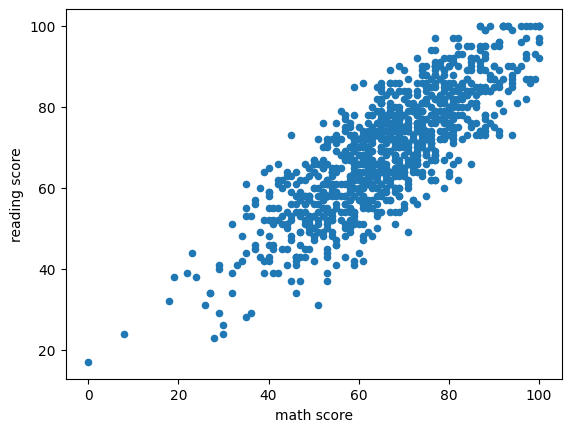

In [8]:
student_performance.plot.scatter(x = 'math score', y = 'reading score')

AttributeError: 'FacetGrid' object has no attribute 'set_ylabel'

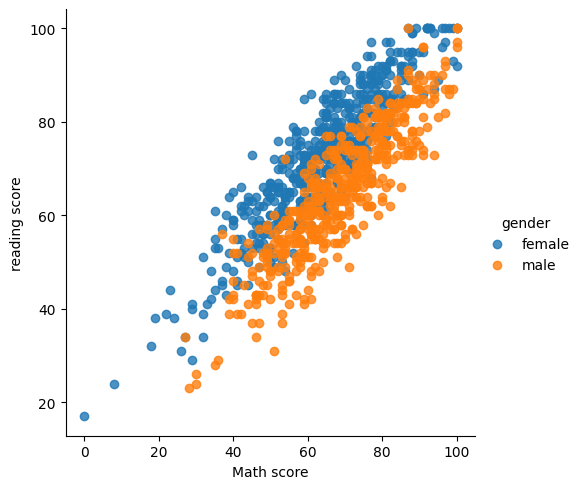

In [12]:
ax = sns.lmplot(x = 'math score', y = 'reading score', hue = 'gender', data = student_performance, fit_reg=False)
ax.set_xlabels('Math score')
ax.set_ylabel('Reading score')

In [13]:
df = pd.read_csv('https://stepik.org/media/attachments/course/4852/income.csv')

In [14]:
df

,income
2018-11-30,20
2018-12-31,60
2019-01-31,180
2019-02-28,380
2019-03-31,660


<Axes: >

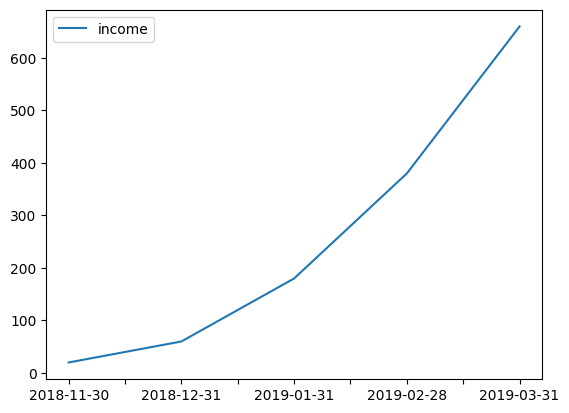

In [16]:
df.plot()

<Axes: xlabel='None', ylabel='income'>

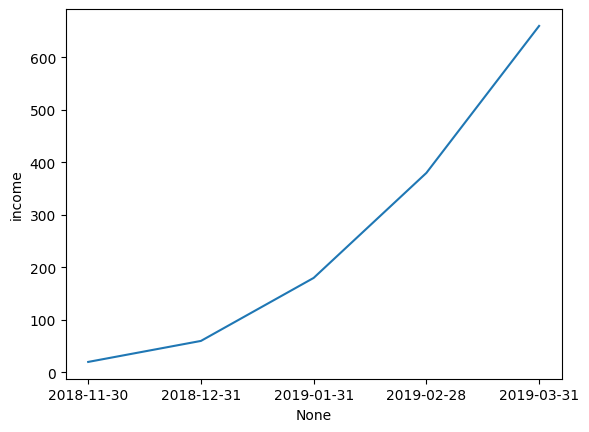

In [17]:
sns.lineplot(x = df.index, y = df.income)

<Axes: >

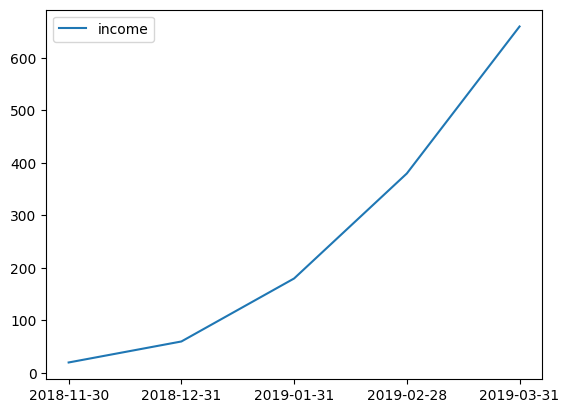

In [18]:
sns.lineplot(data=df)

<Axes: >

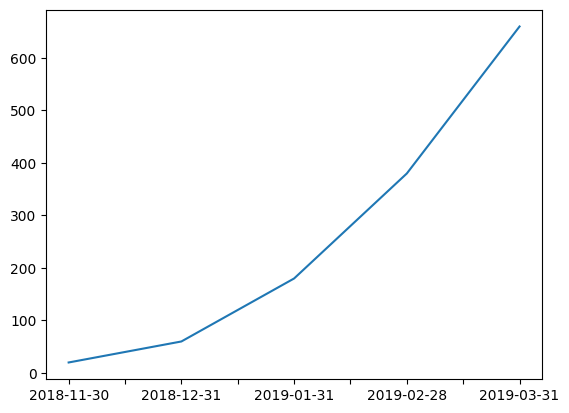

In [19]:
df.income.plot()

In [25]:
df = pd.read_csv('dataset_209770_6.txt', sep=' ')

In [26]:
df

,x,y
0,1305.506566,1001.511115
1,1494.364759,1205.734281
2,702.978962,84.222195
3,496.598381,600.386717
4,707.594721,90.708833
...,...,...
95,702.522982,87.021496
96,1497.811442,1205.014883
97,1296.902913,1001.103026
98,1504.102824,1182.769025


<Axes: xlabel='x', ylabel='y'>

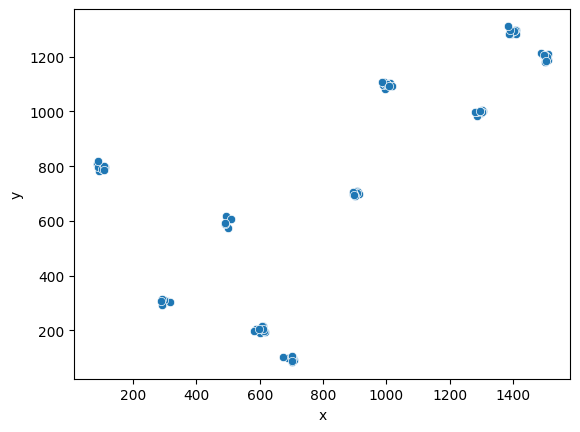

In [27]:
sns.scatterplot(x = 'x', y = 'y', data = df)

In [31]:
df = pd.read_csv('https://stepik.org/media/attachments/course/4852/genome_matrix.csv', index_col = 0)

df

,species0,species1,species2,species3,species4
species0,0.536029,0.920292,0.679708,0.840606,0.430842
species1,0.920292,0.862417,0.887593,0.769754,0.203214
species2,0.679708,0.887593,0.595156,0.003435,0.096052
species3,0.840606,0.769754,0.003435,0.458870,0.029251
species4,0.430842,0.203214,0.096052,0.029251,0.642109


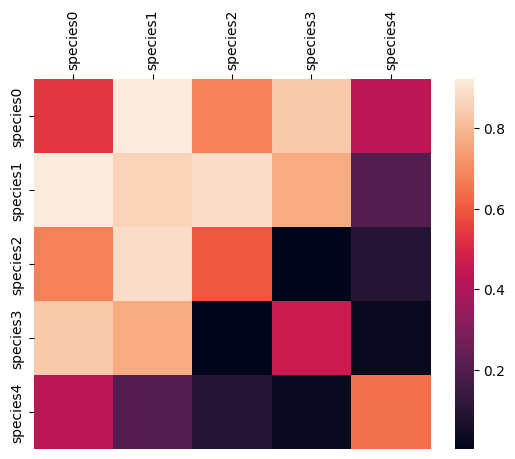

In [33]:
g = sns.heatmap(data = df)
g.xaxis.set_ticks_position('top')
g.xaxis.set_tick_params(rotation=90)

Пришло время узнать, кто самый главный рак какая роль в dota самая распространённая. Скачайте датасэт с данными о героях из игры dota 2 и посмотрите на распределение их возможных ролей в игре (колонка roles). Постройте гистограмму, отражающую скольким героям сколько ролей приписывается (по мнению Valve, конечно) и напишите какое число ролей у большинства героев.

Задача решалась трудно, потому что очень лень переводить документацию, в итоге просто натыкал вот что:

у нас есть пандовская серия, которая входит в состав нашего датафрейма и визуально она выглядит как список, но, питоновские методы по определению длины списка(количества элементов в нем) не работают.

Чтобы решить этот вопрос нужно создать настоящий список, это можно сделать, если воспользоваться методом:

Series.str.split()

тогда список уже будет настоящим, и у можно будет вычислить его длину, общее выражение будет выглядеть так:

Series.str.split().str.len()

Как построить гистограмму я не сообразил, но вспомнил, что можно воспользоваться одним из методов серии, например, поиском медианы.


In [8]:
df = pd.read_csv('https://stepik.org/media/attachments/course/4852/dota_hero_stats.csv')

In [9]:
df

,Unnamed: 0,attack_type,id,legs,localized_name,name,primary_attr,roles
0,0,Melee,1,2,Anti-Mage,npc_dota_hero_antimage,agi,"['Carry', 'Escape', 'Nuker']"
1,1,Melee,2,2,Axe,npc_dota_hero_axe,str,"['Initiator', 'Durable', 'Disabler', 'Jungler']"
2,2,Ranged,3,4,Bane,npc_dota_hero_bane,int,"['Support', 'Disabler', 'Nuker', 'Durable']"
3,3,Melee,4,2,Bloodseeker,npc_dota_hero_bloodseeker,agi,"['Carry', 'Disabler', 'Jungler', 'Nuker', 'Ini..."
4,4,Ranged,5,2,Crystal Maiden,npc_dota_hero_crystal_maiden,int,"['Support', 'Disabler', 'Nuker', 'Jungler']"
...,...,...,...,...,...,...,...,...
112,112,Melee,114,2,Monkey King,npc_dota_hero_monkey_king,agi,"['Carry', 'Escape', 'Disabler', 'Initiator']"
113,113,Ranged,119,2,Dark Willow,npc_dota_hero_dark_willow,int,"['Support', 'Nuker', 'Disabler', 'Escape']"
114,114,Melee,120,2,Pangolier,npc_dota_hero_pangolier,agi,"['Carry', 'Nuker', 'Disabler', 'Durable', 'Esc..."
115,115,Ranged,121,2,Grimstroke,npc_dota_hero_grimstroke,int,"['Support', 'Nuker', 'Disabler', 'Escape']"


In [33]:
max = 0
for i in df.roles:

  if len(i.split(',')) >= max:

    max = len(i.split(','))

print(max)

6


In [34]:
df['cnt'] = df.roles.str.count(',')+1

In [37]:
lenths = [len(r.split(',')) for r in df.roles]
df['lenths'] = lenths

<Axes: >

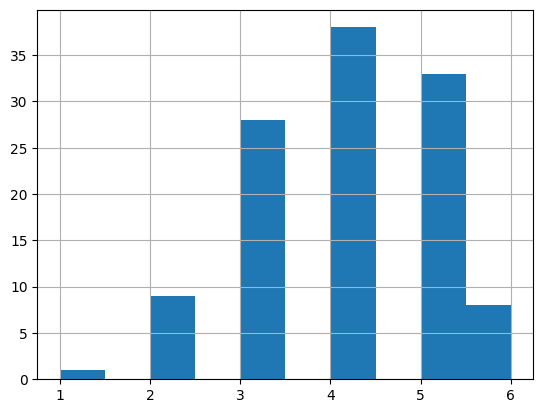

In [39]:
df['lenths'].hist()

Теперь перейдём к цветочкам. Магистрантка Адель решила изучить какие бывают ирисы. Помогите Адель узнать об ирисах больше - скачайте датасэт со значениями параметров ирисов, постройте их распределения и отметьте правильные утверждения, глядя на график.

In [50]:
df = pd.read_csv('https://stepik.org/media/attachments/course/4852/iris.csv', index_col = 0)

df

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


<Axes: ylabel='Density'>

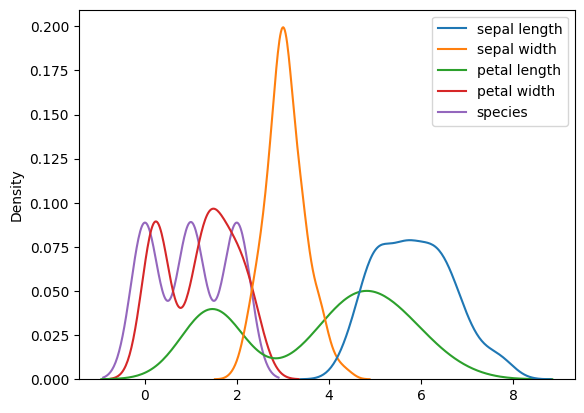

In [45]:
sns.kdeplot(data=df)

Рассмотрим длину лепестков (petal length) подробнее и воспользуемся для этого violin плотом. Нарисуйте распределение длины лепестков ирисов из предыдущего датасэта с помощью violin плота и выберите правильный (такой же) вариант среди предложенных

<Axes: ylabel='petal length'>

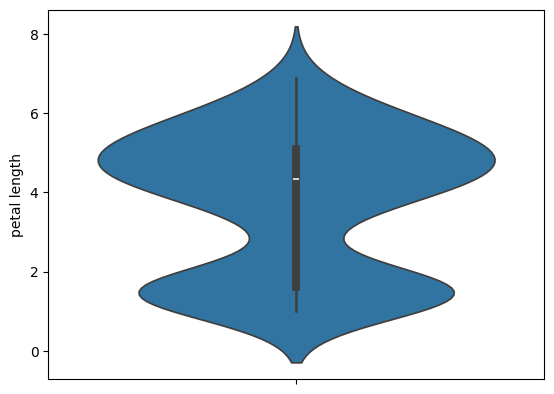

In [47]:
sns.violinplot( data = df['petal length'] )

Продолжаем изучение ирисов! Ещё один важный тип графиков - pairplot, отражающий зависимость пар переменных друг от друга, а также распределение каждой из переменных. Постройте его и посмотрите на scatter плоты для каждой из пар фичей. Какая из пар навскидку имеет наибольшую корреляцию?

Также обратите внимание, что можно разделить на группы с помощью параметра hue.

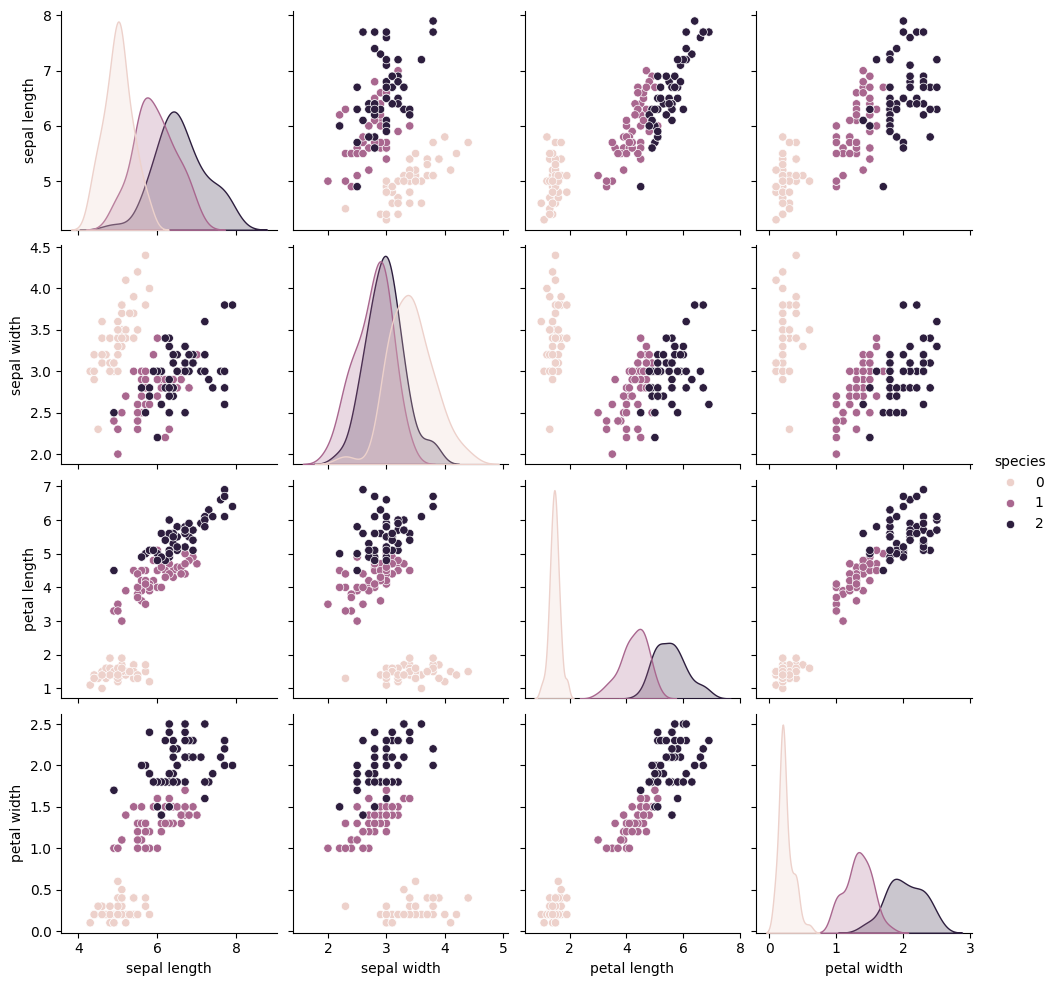

In [49]:
sns.pairplot( data = df, hue="species" )

In [51]:
df.corr()

,sepal length,sepal width,petal length,petal width,species
sepal length,1.000000,-0.109369,0.871754,0.817954,0.782561
sepal width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal length,0.871754,-0.420516,1.000000,0.962757,0.949043
petal width,0.817954,-0.356544,0.962757,1.000000,0.956464
species,0.782561,-0.419446,0.949043,0.956464,1.000000


In [56]:
type = ['A', 'A', 'B', 'B']

values = [10, 14, 12, 23]

d = {'type': type, 'values': values}

In [57]:
my_data = pd.DataFrame(d)

In [64]:
df = pd.read_csv('https://stepik.org/media/attachments/course/4852/my_stat.csv')



,V1,V2,V3,V4
0,2,13.0,B,1.0
1,-1,7.0,B,1.0
2,0,11.0,A,0.0
3,2,11.0,A,2.0
4,0,10.0,B,-1.0
...,...,...,...,...
495,1,8.0,A,-1.0
496,3,8.0,A,1.0
497,-1,11.0,B,2.0
498,1,11.0,A,2.0


In [66]:
head = list(df.head())
head

['V1', 'V2', 'V3', 'V4']

In [85]:
df.loc[df.index < 10, [head[0], head[2]]]

,V1,V3
0,2,B
1,-1,B
2,0,A
3,2,A
4,0,B
5,2,A
6,0,A
7,1,A
8,0,B
9,-1,A


In [88]:
df.loc[(df['V1'] > 0) & (df['V3'] == 'A') ]

,V1,V2,V3,V4
3,2,11.0,A,2.0
5,2,11.0,A,0.0
7,1,9.0,A,1.0
10,1,10.0,A,1.0
13,1,12.0,A,3.0
...,...,...,...,...
491,4,7.0,A,2.0
494,1,11.0,A,1.0
495,1,8.0,A,-1.0
496,3,8.0,A,1.0


In [89]:
df.loc[(df['V2'] != 10) | (df['V4'] >= 1) ]

,V1,V2,V3,V4
0,2,13.0,B,1.0
1,-1,7.0,B,1.0
2,0,11.0,A,0.0
3,2,11.0,A,2.0
5,2,11.0,A,0.0
...,...,...,...,...
495,1,8.0,A,-1.0
496,3,8.0,A,1.0
497,-1,11.0,B,2.0
498,1,11.0,A,2.0


In [91]:
my_stat = pd.read_csv('https://stepik.org/media/attachments/course/4852/my_stat.csv')

In [93]:
my_stat['V5'] = my_stat['V1'] +my_stat['V4']

my_stat['V6'] = np.log(my_stat['V2'])

my_stat

,V1,V2,V3,V4,V5,V6
0,2,13.0,B,1.0,3.0,2.564949
1,-1,7.0,B,1.0,0.0,1.945910
2,0,11.0,A,0.0,0.0,2.397895
3,2,11.0,A,2.0,4.0,2.397895
4,0,10.0,B,-1.0,-1.0,2.302585
...,...,...,...,...,...,...
495,1,8.0,A,-1.0,0.0,2.079442
496,3,8.0,A,1.0,4.0,2.079442
497,-1,11.0,B,2.0,1.0,2.397895
498,1,11.0,A,2.0,3.0,2.397895


И напоследок давайте разберемся, как заменять наблюдения в данных.

В dataframe с именем my_stat сохранены данные с 4 колонками: session_value, group, time, n_users.  

В переменной session_value замените все пропущенные значения на нули.

В переменной n_users замените все отрицательные значения на медианное значение переменной n_users (без учета отрицательных значений, разумеется).

Как получить медиану переменной n_users без учета отрицательных значений? Если не придумали решения, подсказка - ищите один из возможных ответов в задачах, которые мы уже решили.

In [129]:
my_stat = pd.read_csv('https://stepik.org/media/attachments/course/4852/my_stat_1.csv')

In [130]:
my_stat

,session_value,time,group,n_users
0,0.0,12,B,9
1,NaN,11,A,-1
2,1.0,8,A,1
3,2.0,9,B,3
4,2.0,10,B,9
5,3.0,8,A,8
6,NaN,11,B,5
7,0.0,9,A,4
8,0.0,8,B,-11
9,0.0,9,A,-20


In [131]:
my_stat = my_stat.fillna(value = 0)

my_stat

,session_value,time,group,n_users
0,0.0,12,B,9
1,0.0,11,A,-1
2,1.0,8,A,1
3,2.0,9,B,3
4,2.0,10,B,9
5,3.0,8,A,8
6,0.0,11,B,5
7,0.0,9,A,4
8,0.0,8,B,-11
9,0.0,9,A,-20


In [135]:
my_stat = my_stat.fillna(value = 0)

for i in range(len(my_stat.n_users)):

    if my_stat.n_users[i] < 0.0:

        med = my_stat.loc[(my_stat.n_users >= 0) & (my_stat.n_users != -0.0), ['n_users']].median()

        my_stat.n_users[i] = med[0]

In [136]:
my_stat

,session_value,time,group,n_users
0,0.0,12,B,9
1,0.0,11,A,5
2,1.0,8,A,1
3,2.0,9,B,3
4,2.0,10,B,9
5,3.0,8,A,8
6,0.0,11,B,5
7,0.0,9,A,4
8,0.0,8,B,5
9,0.0,9,A,5


Чуть не забыли, никакой анализ данных не обходится без агрегации наблюдений. Напомню, в pandas с этим нам поможет связка  groupby + некоторое преобразование. Например:

число наблюдений в каждой группе
df.groupby('group_var').count()
Для того, что бы сгруппировать данные по нескольким переменным, используем список с нужными именами:

df.groupby(['group_var_1', 'group_var_2']).count()
Обратите внимание, что при такой записи группирующие переменные станут индексами в итоговом dataframe, изучите справку по groupby, чтобы разобраться со всеми тонкостями группировки данных. Также функция count() применится ко всем колонкам, что не всегда является желанным результатом. Чтобы применить функцию только к нужной колонке в данных, можно использовать связку  groupby() + agg()

my_stat.groupby('group').agg({'n_users': 'count'})
В этой задаче для данных my_stat рассчитайте среднее значение переменной session_value для каждой группы (переменная group), в получившемся dataframe  переменная group не должна превратиться в индекс. Также переименуйте колонку со средним значением session_value в mean_session_value.

Получившийся результат сохраните в dataframe с именем mean_session_value_data.

In [137]:
my_stat = pd.read_csv('https://stepik.org/media/attachments/course/4852/my_stat_1.csv')

In [138]:
my_stat

,session_value,time,group,n_users
0,0.0,12,B,9
1,NaN,11,A,-1
2,1.0,8,A,1
3,2.0,9,B,3
4,2.0,10,B,9
5,3.0,8,A,8
6,NaN,11,B,5
7,0.0,9,A,4
8,0.0,8,B,-11
9,0.0,9,A,-20


In [142]:
my_stat.groupby('group', as_index = False).aggregate({'session_value': 'mean'}).rename(columns = {'session_value': ' mean_session_value'})

,group,mean_session_value
0,A,1.0
1,B,1.0
